# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time
from collections import Counter
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

2023-03-16 12:53:32.700586: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 12:53:33.058393: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-16 12:53:33.058421: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-16 12:53:34.535448: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

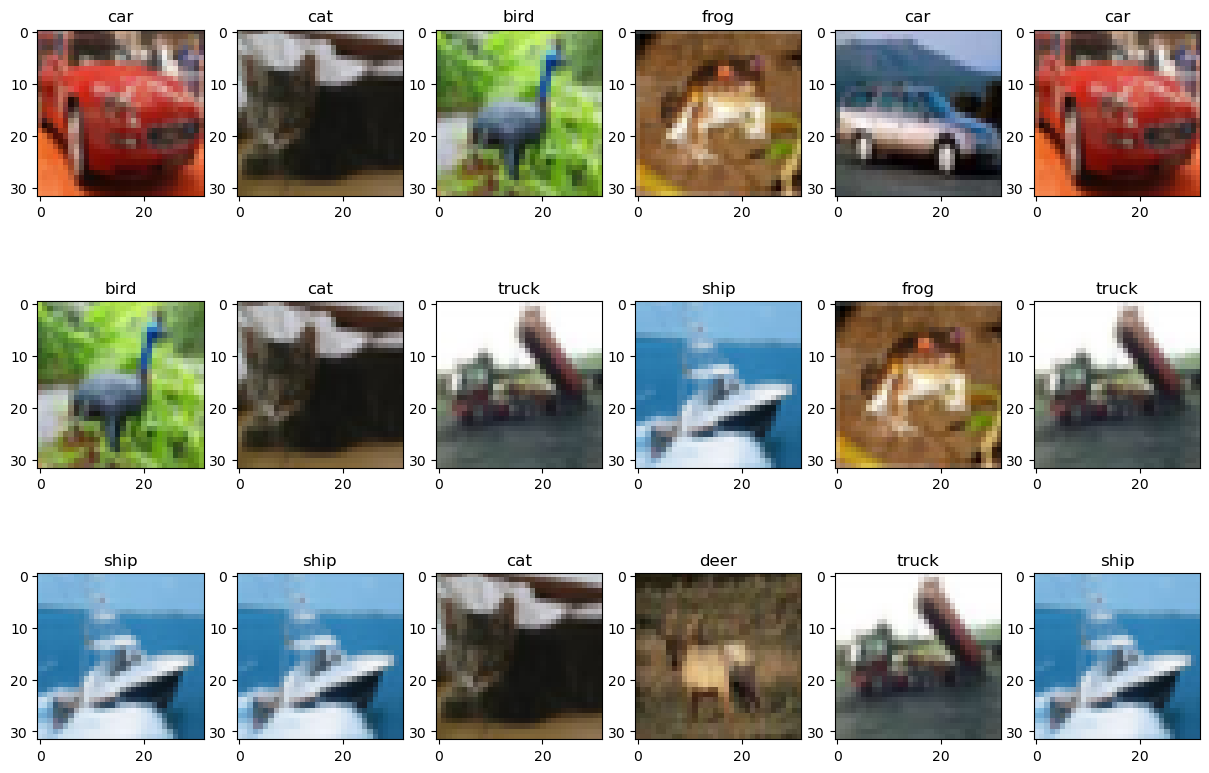

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]


# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, num_classes)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

In [3]:
# Compute the class histogram
class_samples = []
for y in y_train:
    y = int(y)
    class_samples.append(y)
    
print(class_samples)
    

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})


(Text(0.5, 0, ''), Text(0, 0.5, 'Counts'))

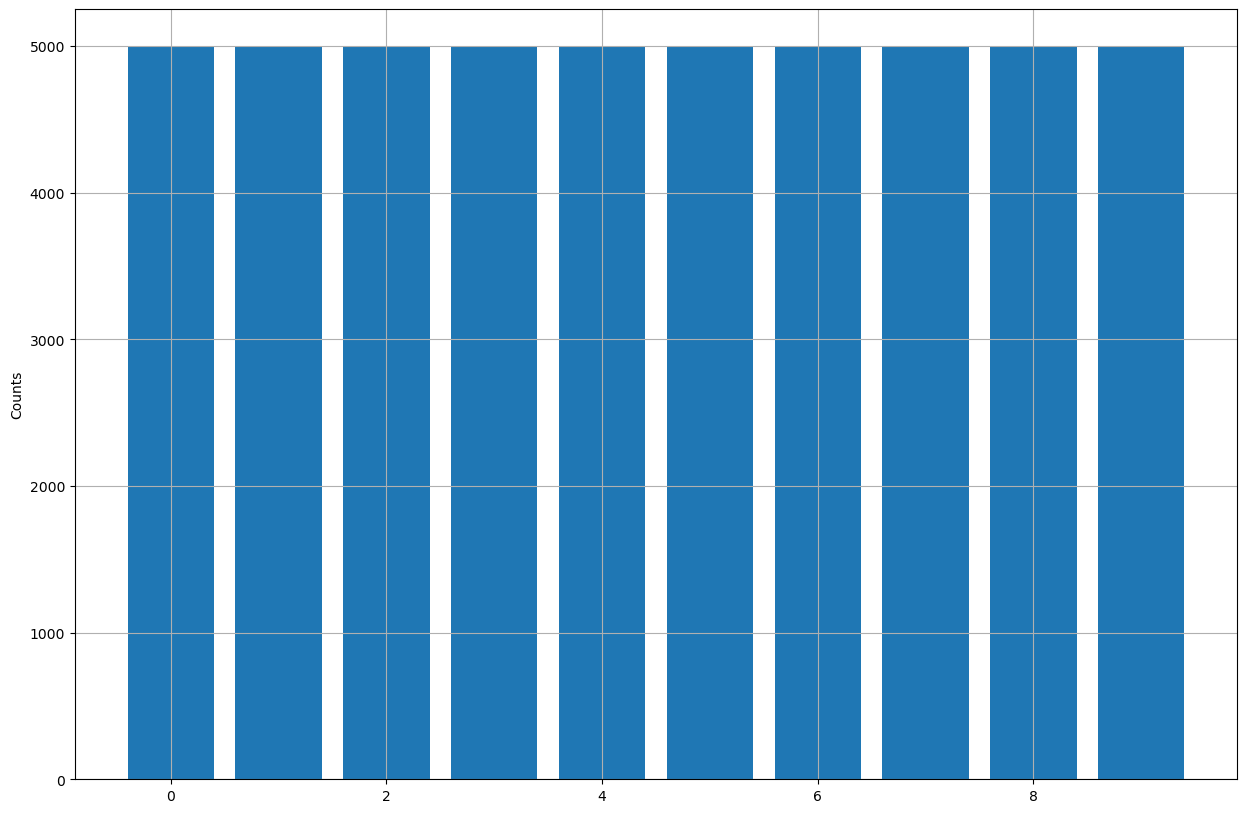

In [4]:
hist_class_ids = Counter(class_samples)
print(hist_class_ids)

plt.bar(hist_class_ids.keys(), hist_class_ids.values()), plt.grid(True)
plt.xlabel(''), plt.ylabel('Counts')

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [5]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [6]:
# Build the classifier
# Build model
inputs = Input(shape=(size, size, 3))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding = 'same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding = 'same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding = 'same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

2023-03-16 12:54:38.754062: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-16 12:54:38.754114: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-16 12:54:38.754149: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost.localdomain): /proc/driver/nvidia/version does not exist
2023-03-16 12:54:38.755071: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928 

### Step 3: Training

Compile the model and train it.

In [7]:
epochs = 35
batch_size = 128

# Compile the model

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

2023-03-16 12:54:49.002068: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 552960000 exceeds 10% of free system memory.


Epoch 1/35
352/352 [==============================] - 113s 318ms/step - loss: 1.6384 - accuracy: 0.4111 - val_loss: 1.3561 - val_accuracy: 0.5266
Epoch 2/35
352/352 [==============================] - 118s 336ms/step - loss: 1.2707 - accuracy: 0.5517 - val_loss: 1.2367 - val_accuracy: 0.5580
Epoch 3/35
352/352 [==============================] - 111s 316ms/step - loss: 1.1244 - accuracy: 0.6068 - val_loss: 1.0570 - val_accuracy: 0.6304
Epoch 4/35
352/352 [==============================] - 103s 291ms/step - loss: 1.0106 - accuracy: 0.6490 - val_loss: 0.9768 - val_accuracy: 0.6674
Epoch 5/35
352/352 [==============================] - 99s 280ms/step - loss: 0.9403 - accuracy: 0.6744 - val_loss: 0.9628 - val_accuracy: 0.6658
Epoch 6/35
352/352 [==============================] - 109s 309ms/step - loss: 0.8908 - accuracy: 0.6936 - val_loss: 0.9118 - val_accuracy: 0.6888
Epoch 7/35
352/352 [==============================] - 125s 355ms/step - loss: 0.8409 - accuracy: 0.7096 - val_loss: 0.8802 - 

Train Acc      0.9052444696426392
Validation Acc 0.7314000129699707


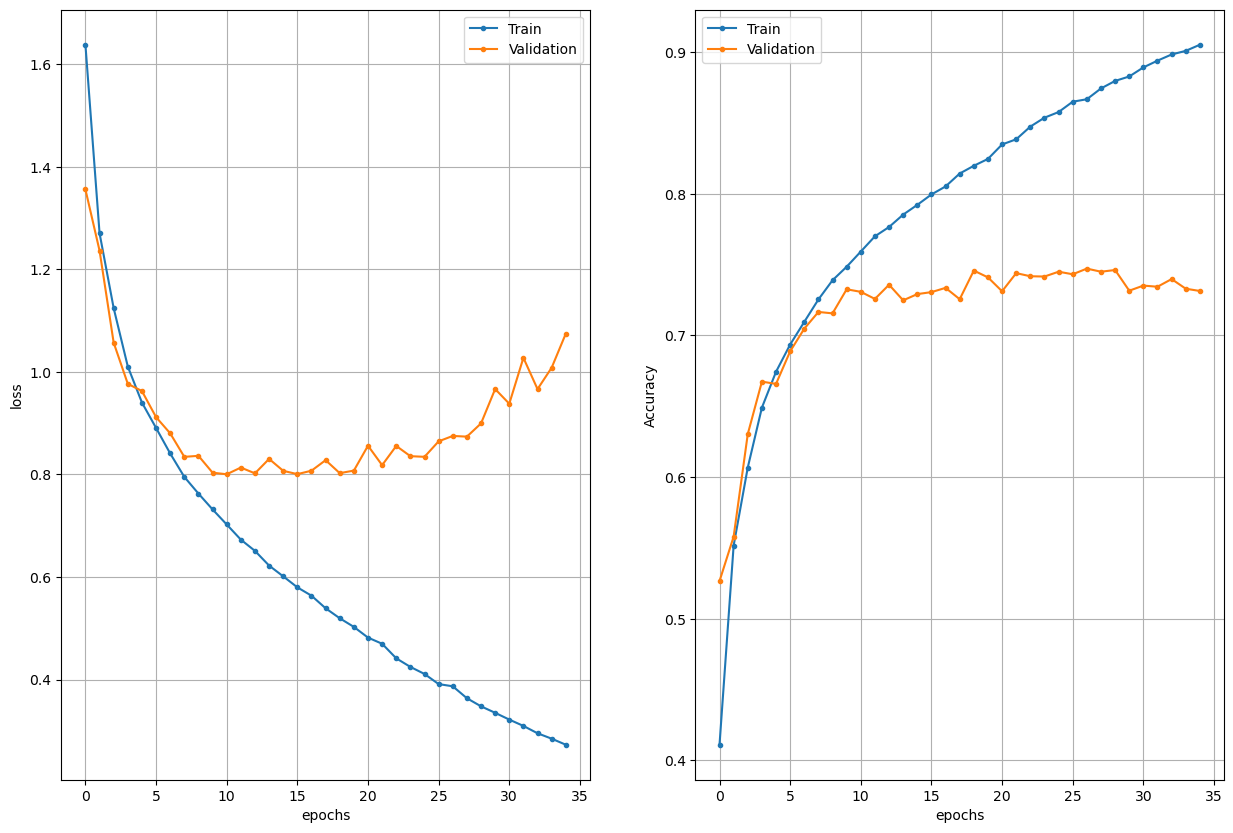

In [8]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [9]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[2:11])
print('Pred', np.argmax(y_pred[2:11, :], axis=1))
print('Pred', y_pred[2:11, :])
print(y_pred.shape)

2023-03-16 14:03:23.495462: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 11s 33ms/step
True [8 0 6 6 1 6 3 1 0]
Pred [8 0 6 6 1 6 3 1 4]
Pred [[8.18881963e-04 2.02792883e-03 3.90556079e-06 2.21419701e-04
  6.71450789e-06 4.88897931e-05 1.39184351e-07 2.99229778e-05
  9.56080854e-01 4.07613590e-02]
 [9.23203886e-01 1.39974567e-04 2.12768139e-03 7.03704136e-04
  3.81676546e-06 1.50299784e-09 2.16249518e-07 5.34123075e-08
  7.38182813e-02 2.27230180e-06]
 [8.98591585e-13 1.44438583e-09 1.02208916e-03 2.98871484e-04
  2.50586978e-04 4.45122481e-07 9.98427391e-01 3.18178817e-12
  7.29381100e-07 1.60998648e-09]
 [1.62028229e-07 4.27640101e-09 3.80833558e-06 1.29646773e-03
  4.38265088e-05 2.37146771e-04 9.98415232e-01 1.91410436e-06
  6.39528119e-09 1.40048758e-06]
 [3.53334394e-06 9.99698400e-01 1.57694004e-07 1.66460974e-04
  5.02623472e-08 8.43747257e-05 3.15906945e-08 5.53806174e-08
  4.26009166e-08 4.69051229e-05]
 [2.49089440e-03 9.98011910e-06 4.79496084e-02 1.77451730e-01
  7.67340213e-02 7.09954940e-04 6.8622231

In [11]:
# Compute and print the accuracy for each class
y_pred = np.argmax(y_pred, axis = 1)
for class_id, class_name in classes.items():
    mask = y_true == class_id
    
    tp = np.sum(y_pred[mask] == class_id)
    total = np.sum(mask)
    
    acc = tp/total
    print(class_name, acc)

plane 0.739
car 0.759
bird 0.616
cat 0.575
deer 0.569
dog 0.555
frog 0.795
horse 0.738
ship 0.908
truck 0.837


In [36]:
ev = model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 21ms/step - loss: 1.0388 - accuracy: 0.6969


In [12]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

  3/313 [..............................] - ETA: 10s - loss: 1.2539 - accuracy: 0.6875

2023-03-16 14:06:18.422391: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 10s 33ms/step - loss: 1.1547 - accuracy: 0.7091
Test loss   1.1546611785888672
Test metric 0.7091000080108643


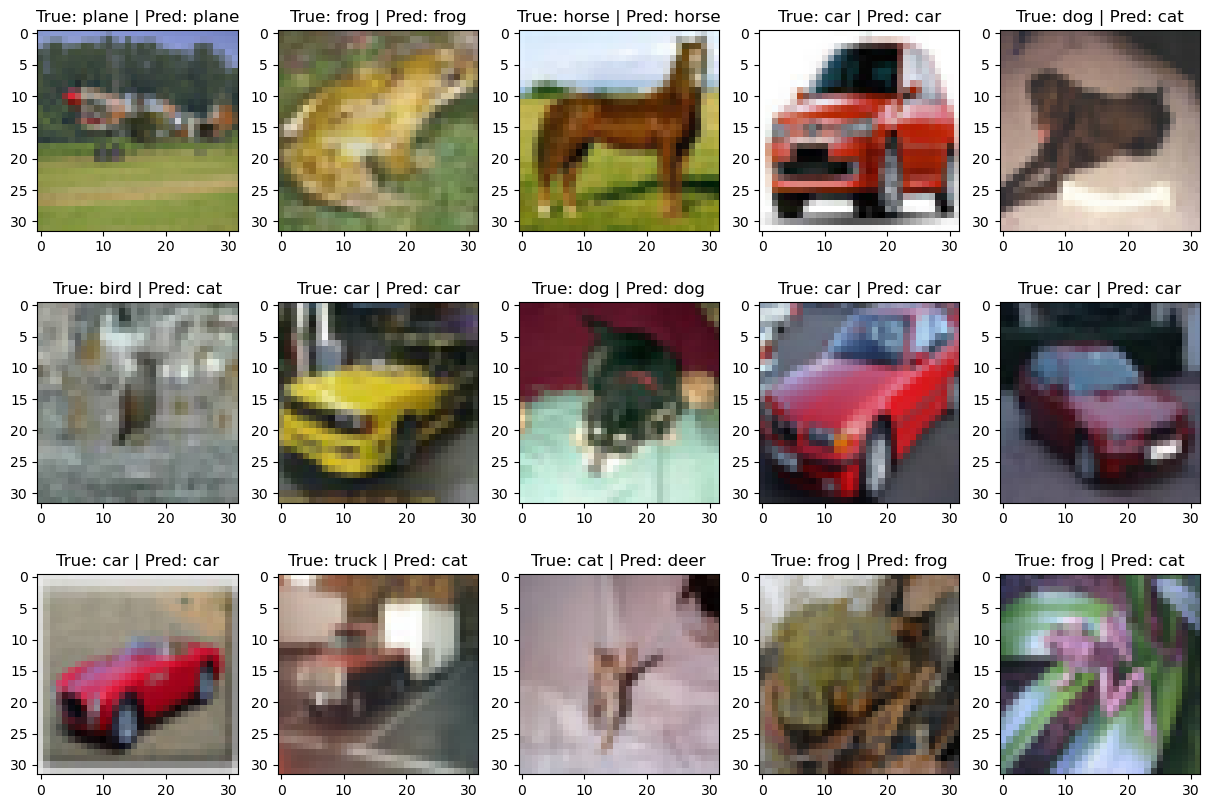

In [13]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(y_pred))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* Is the dataset balanced?
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

1.My histogram of classes shows that the dataset is well-balanced as there are equal amount of representators of each class.
2.The overall accuracy raises not higher than ~ 0,75. It is better than the random choice (if accuracy~0,5), but not a very good result.
3-4 Before leaving this variant of code I tried to make several changes of my model - added new convolutional layers, added neorons, changed kernel sizes, added more epochs and even changed batch size (I think the last option could not impact anything, but nevertheless). The result accuracy fluctuated from ~0,6 to 0,75, so it had some positive shifts, but the acceptable accuracy of ~0,9 hasn't been achieved. I believe for making better results I should do more manipulations with data preprocessing or use another architecture of NN.